In [1]:
import matplotlib.pyplot as plt
import numpy as np
from process import *
from saliency import *

root = "/home/kavra/Datasets/medical/cvi_eyetracking/asc_data_v1/"
trial = "Freeviewingstillimage_16.jpg"

# TODO: Perform Mann-Whitney test on CVI - ctrl

ids = [i for i in os.listdir(root) if i.endswith('.asc')]
ctrl_ids = [i.split(".")[0] for i in ids if i.split('_')[0].startswith("2")]
cvi_ids = [i.split(".")[0] for i in ids if i.split(".")[0] not in ctrl_ids]

In [2]:
TRIAL_LIST = [
    "Freeviewingstillimage_1",
    "Freeviewingstillimage_2",
    "Freeviewingstillimage_4",
    "Freeviewingstillimage_5",
    "Freeviewingstillimage_7",
    "Freeviewingstillimage_8",
    "Freeviewingstillimage_9",
    "Freeviewingstillimage_10",
    "Freeviewingstillimage_10_cutout",
    "Freeviewingstillimage_11",
    "Freeviewingstillimage_12",
    "Freeviewingstillimage_13",
    "Freeviewingstillimage_15",
    "Freeviewingstillimage_16",
    "Freeviewingstillimage_17",
    "Freeviewingstillimage_18",
    "Freeviewingstillimage_19",
    "Freeviewingstillimage_20",
    "Freeviewingstillimage_21",
    "Freeviewingstillimage_22",
    "Freeviewingstillimage_23",
    "Freeviewingstillimage_24",
    "Freeviewingstillimage_25",
    "Freeviewingstillimage_26",
    "Freeviewingstillimage_27",
    "Freeviewingstillimage_28",
    "Freeviewingstillimage_28_cutout",
    "Freeviewingstillimage_29",
    "Freeviewingstillimage_31",
    "Freeviewingstillimage_33",
    "Freeviewingstillimage_35",
    "Freeviewingstillimage_36",
    "Freeviewingstillimage_36_cutout",
    "Freeviewingstillimage_39",
    "Freeviewingstillimage_40",
    "Freeviewingstillimage_41",
    "Freeviewingstillimage_45",
    "Freeviewingstillimage_46",
    "Freeviewingstillimage_47",
    "Freeviewingstillimage_88",
    "Freeviewingstillimage_92",
    "Freeviewingstillimage_93",
    "Freeviewingstillimage_93_cutout",
    "Moviestillimage_6",
    "Moviestillimage_8",
    "visual search form 4_1",
    "visual search form 8_1",
    "visual search form 16_1",
    "visual search form 24_1",
    "visual search form 32_1",
    "visual search orientation 4_1",
    "visual search orientation 8_1",
    "visual search orientation 16_1",
    "visual search orientation 24_1",
    "visual search orientation 32_1",
]

In [3]:
from tqdm import tqdm
for trial in tqdm(TRIAL_LIST):
    this_trial = ImageTrial(root, trial, "smaps")
    a = this_trial.load_saliency_map("by")

Freeviewingstillimage_1
Freeviewingstillimage_2
Freeviewingstillimage_4
Freeviewingstillimage_5
Freeviewingstillimage_7
Freeviewingstillimage_8
Freeviewingstillimage_9
Freeviewingstillimage_10
Freeviewingstillimage_10_cutout
Freeviewingstillimage_11
Freeviewingstillimage_12
Freeviewingstillimage_13
Freeviewingstillimage_15
Freeviewingstillimage_16
Freeviewingstillimage_17
Freeviewingstillimage_18
Freeviewingstillimage_19
Freeviewingstillimage_20
Freeviewingstillimage_21
Freeviewingstillimage_22
Freeviewingstillimage_23
Freeviewingstillimage_24
Freeviewingstillimage_25
Freeviewingstillimage_26
Freeviewingstillimage_27
Freeviewingstillimage_28
Freeviewingstillimage_28_cutout
Freeviewingstillimage_29
Freeviewingstillimage_31
Freeviewingstillimage_33
Freeviewingstillimage_35
Freeviewingstillimage_36
Freeviewingstillimage_36_cutout
Freeviewingstillimage_39
Freeviewingstillimage_40
Freeviewingstillimage_41
Freeviewingstillimage_45
Freeviewingstillimage_46
Freeviewingstillimage_47
Freeviewing

/home/kavra/Repos/cvi-eye-tracking/saliency/__init__.py:16: RuntimeWarning: invalid value encountered in true_divide
  smap /= smap.max()


visual search orientation 32_1


In [8]:
max(a.flatten())

0

In [6]:
smap = a
map = (smap - np.min(smap))/(np.max(smap) - np.min(smap))

In [ ]:
for i in ctrl_ids + cvi_ids:
    sub0 = Subject(root, i)
    data0, fr0 = sub0.extract_data(trial, vel=False)

    out = sub0.extract_fixations(trial_name=trial)
    data0[data0 == 0.0] = np.nan

    plt.plot(data0[:, 0], data0[:, 1], zorder=-1)
    l = [np.mean(i["data"], axis=0) for i in out]
    plt.scatter([i[0] for i in l], [i[1] for i in l], color="red", zorder=1)
    plt.show()

In [15]:
sub = Subject(root, "1015_1")
data = sub.extract_data(trial, vel=False)
fix_analyzer = FixationAnalyzer(root, out)
a = fix_analyzer.fixation_map(trial)

In [ ]:
durations_ctrl = []
for subject in ctrl_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    print(dur)
    durations_ctrl.append(dur)

durations_cvi = []
for subject in cvi_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    durations_cvi.append(dur)

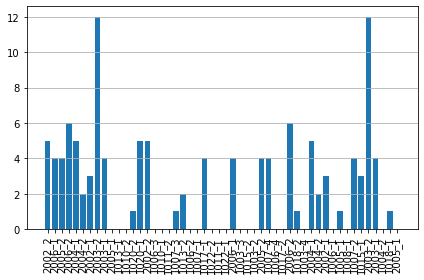

In [9]:
names = ctrl_ids + cvi_ids
t = list(range(len(names)))

plt.bar(t, durations_ctrl + durations_cvi)
plt.xticks(t, names, rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

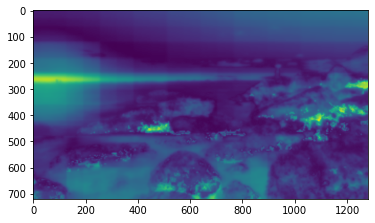

In [40]:
smap = np.load(os.path.join("output/extra", "saliency_maps", trial[:-4], trial[:-4] + "_color.npy"))
smap = (smap - np.min(smap))/(np.max(smap) - np.min(smap))
plt.imshow(smap);